# Simulation of the Boltzmann Wealth Model

This notebook simulates the long-term behaviour of the wealth distribution among a group of agents, according to their initial wealth, transaction method and their transaction partner. We can see how these factors influence wealth distribution across a population.

In [1]:
import boltzmann_wealth 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('mode.use_inf_as_na', False)

In [3]:
# Plot histogram
def group_plot(plot_rows,plot_cols,data_table,num_bins,param_set):
    fig, axes = plt.subplots(plot_rows, plot_cols, figsize=(15, 8))  
    axes = axes.flatten()
    for i, col in enumerate(data_table.columns):
        sns.histplot(data_table[col], bins=num_bins, kde=True, ax=axes[i], color='blue')
        axes[i].set_title(col)
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
    fig.suptitle(f"wealth distribution at parameter set: {param_set}")
    plt.tight_layout()
    plt.show()

## Risk-based transaction

First, we simulate the long-term wealth distribution of a group of agents under risk-based transaction. i.e. the transaction amount is proportional to agent's own wealth, determined by the parameter "risk_fraction". The neighbourhood of its transaction is determined by the "neightbourhood_factor". 

In [2]:
# Risk-based transaction step
def transaction_by_risk(width, height,num_agents,initial_wealth,
                        risk_fraction,neighbourhood_factor,num_of_steps):
    distribution_table = pd.DataFrame(columns=initial_wealth)
    for s, wealth in enumerate(initial_wealth):
        
        group_transact = boltzmann_wealth.BoltzmannWealthModel(width, height, num_agents, wealth)
        
        for step in range(num_of_steps):
            group_transact.step_risk_transaction(width * neighbourhood_factor, risk_fraction)
        distribution_table.loc[:,wealth] = group_transact.data_collection()
        del group_transact
    return distribution_table

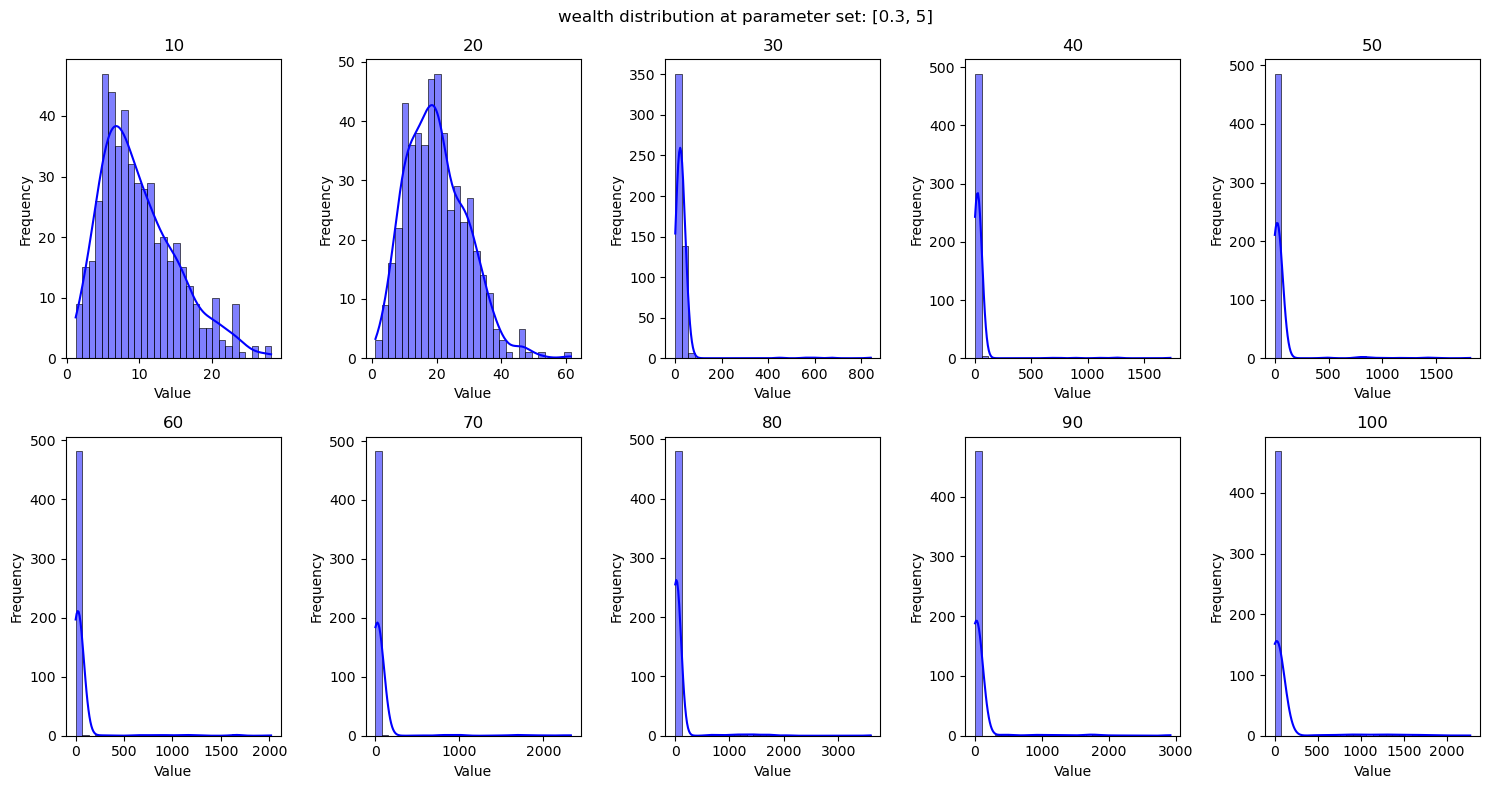

In [4]:
# Simulate 500 agents under implemented risk and neighbourhood parameters
parameters=[0.3,5]
initial_amount = 10
dist_table_1 = transaction_by_risk(width=10,height=10,num_agents=500,
                    initial_wealth=[initial_amount*(i+1) for i in range(0,10)],
                    risk_fraction=parameters[0],neighbourhood_factor=parameters[1],
                    num_of_steps=1000)
group_plot(2,5,dist_table_1,30,parameters)

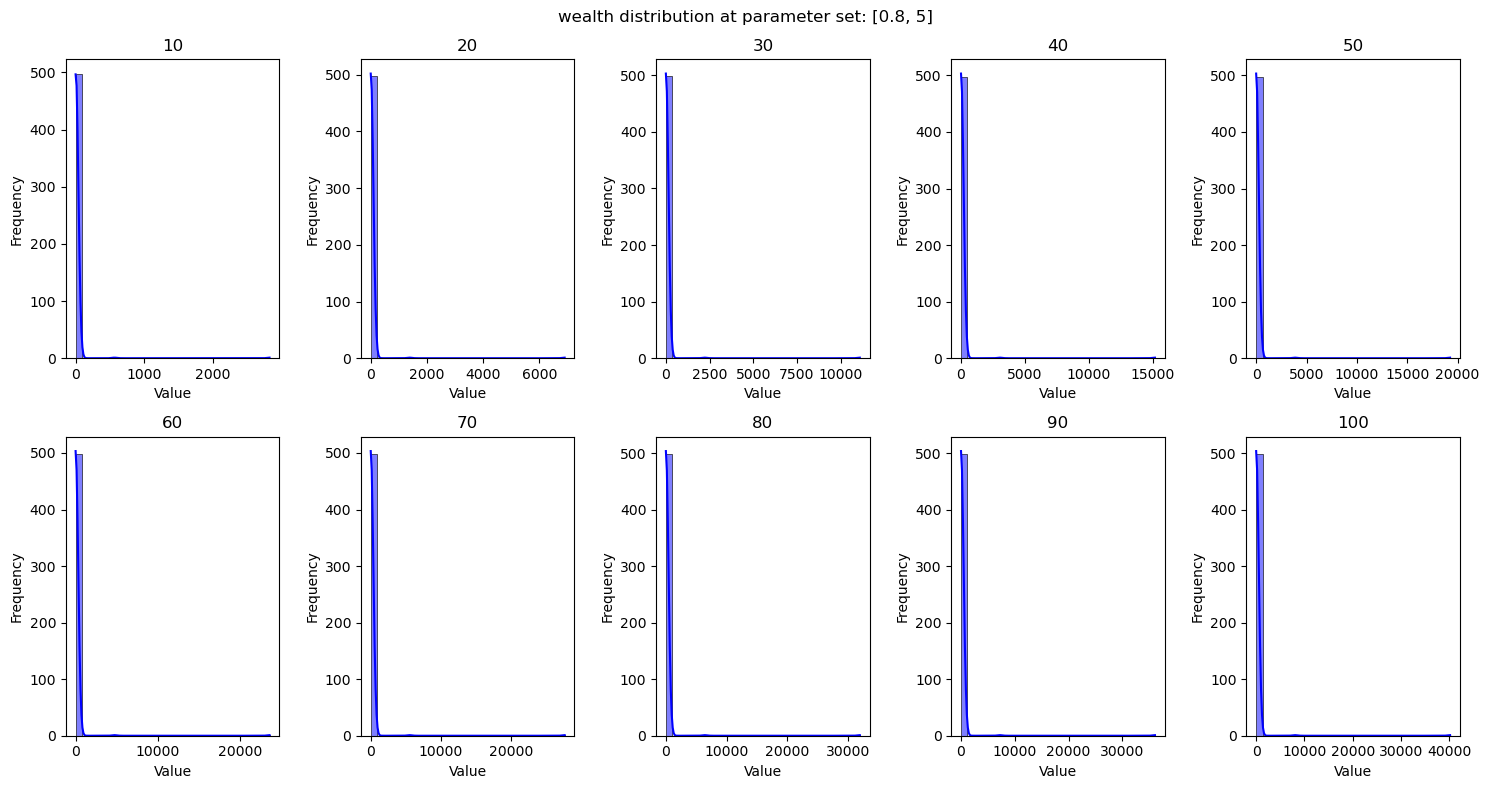

In [6]:
# Simulate 500 agents under implemented risk and neighbourhood parameters
# High risk transaction
parameters=[0.8,5]
initial_amount = 10
dist_table_1 = transaction_by_risk(width=10,height=10,num_agents=500,
                    initial_wealth=[initial_amount*(i+1) for i in range(0,10)],
                    risk_fraction=parameters[0],neighbourhood_factor=parameters[1],
                    num_of_steps=1000)
group_plot(2,5,dist_table_1,30,parameters)

## Transaction based on the difference between the wealth level of the agents

